<a href="https://colab.research.google.com/github/jahanshukhy/Intro-to-Machine-Learning/blob/main/HW2_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import Housing.csv from the Drive
file_path = '/content/drive/My Drive/ML/HW2/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
# Checking Null
# If there are no NULL values in the dataset, hence it is clean.

housing.isnull().sum()*100/housing.shape[0]

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [5]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.shape



(436, 13)

In [7]:
df_test.shape

(109, 13)

In [8]:
#output without scaling
y_train = df_train.pop('price')
y_val   = df_test.pop('price')

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#define scaler for both normalization and standardization

scalers = {
    "Normalization": MinMaxScaler(),
    "Standardization": StandardScaler()
}

#feature variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']





Normalization
Final theta: [2467756.47104274 3435363.72111159 1211241.57590868 2914781.18748535
 1678051.31770622 1348027.94148898]
Final Train Loss: 1590373493269.21, Validation Loss: 1509221774032.36

Standardization
Final theta: [4795729.22018348  729932.35589789   79334.74233429  641264.73850836
  463855.866686    287331.21112434]
Final Train Loss: 1522069682826.88, Validation Loss: 1596534488482.42



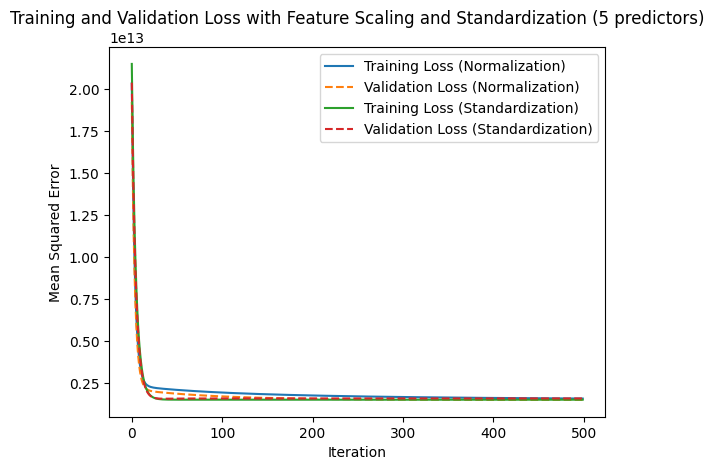

In [10]:
  learning_rate = 0.05
  n_iterations = 500

  #scale input features

  for scale_name, scaler in scalers.items():
    X_train= pd.DataFrame(
        scaler.fit_transform(df_train[num_vars]),
        columns=num_vars
    )
    X_val= pd.DataFrame(
        scaler.transform(df_test[num_vars]),
        columns=num_vars
    )


    m = len(X_train)


    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]


# initial values

    theta = np.zeros(X_b_train.shape[1])

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
       gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
       theta -= learning_rate * gradients

       train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
       val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

       train_losses.append(train_loss)
       val_losses.append(val_loss)

 # Plot the training and validation loss after each iteration

    plt.plot(train_losses, label=f"Training Loss ({scale_name})")
    plt.plot(val_losses, linestyle="--", label=f"Validation Loss ({scale_name})")

    print(f"{scale_name}")
    print("Final theta:", theta)
    print(f"Final Train Loss: {train_losses[-1]:.2f}, Validation Loss: {val_losses[-1]:.2f}\n")


plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss with Feature Scaling and Standardization (5 predictors)")
plt.show()
